In [2]:
#importing the packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

In [3]:
#dataset
df = pd.read_csv('Churn_Modelling.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#looking at the basics of the dataset
df.head()
print('Dataset Info deep')
df.info()
list(df.columns.values)

Dataset Info deep
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [15]:
#Finding the missing values in every column 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
#Columns like Row Number, Customer ID and Surname are not going to help us in finding the churn pattern as these are mostly unique values to each customers.
#So we will drop those
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace=True)
df_1 =  df

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
#As we can see that columns like NumOfProducts, HasCrCard,Exited and IsActiveMember are numerical but these are actually categorical variables
#Changing them into categorical Variables
df[['NumOfProducts','HasCrCard','HasCrCard','Exited']] = df[['NumOfProducts','HasCrCard','HasCrCard','Exited']].astype('object')

In [20]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts       object
HasCrCard           object
IsActiveMember       int64
EstimatedSalary    float64
Exited              object
dtype: object

In [21]:
#Finally Categorizing our data for the user to study
print('The Numerical variable are')
list(df.select_dtypes(include=[np.number]).columns.values)
num_col= df.select_dtypes(include=[np.number]).columns.values
print('The Categorical variables are ')
list(df.select_dtypes(include=[np.object]).columns.values)
cat_col= df.select_dtypes(include=[np.object]).columns.values

The Numerical variable are
The Categorical variables are 


C:\Users\Arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\Arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [22]:
#tranforming the data sideways and calculating the statistical data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


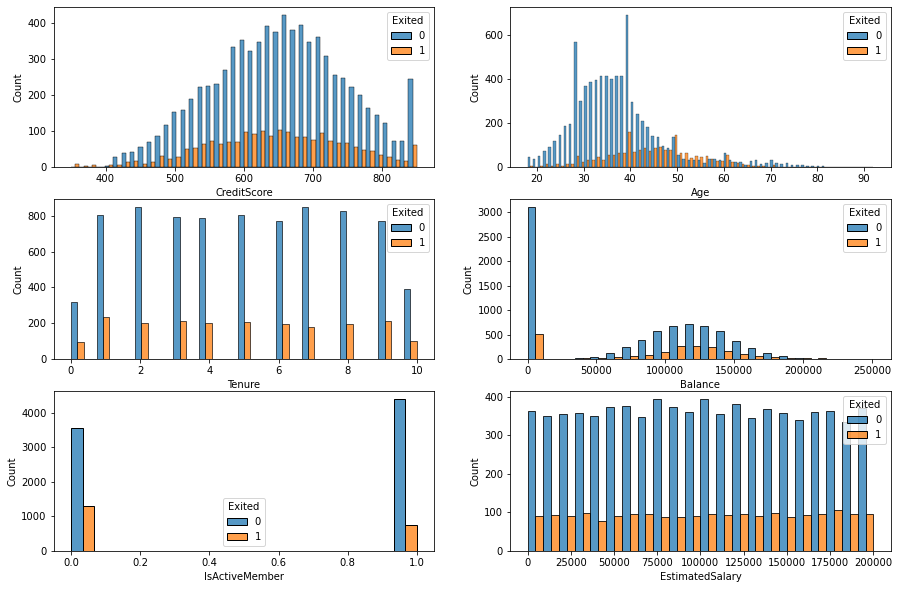

In [25]:
#Data Visualization 
#we are doing this so that we can analyze the data by understanding the trends and patterns
#Then we will put all those data in form of visualization

#Histogram plots
num_col

plt.figure(figsize = (15,10))
for i in enumerate(num_col):
    plt.subplot(3,2, i[0]+1)
    _= sns.histplot(df, x=i[1], hue = 'Exited',multiple="dodge")

In [26]:
#What did we observe from the above plots??
#Balances of the customers are seemed to be symmetrically distributed. Credit Score seems like left skewed.
#There is not much variation in Estimated salary. All the values are lying between 300k to 400k. This variable may not be very helpful in finding out the churn.
#Most of the customers are between the age of 28 to 40.

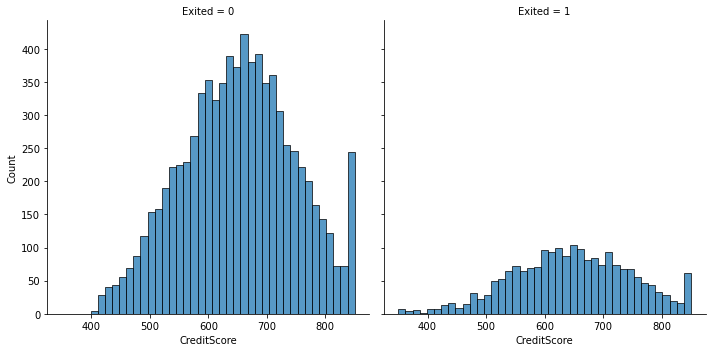

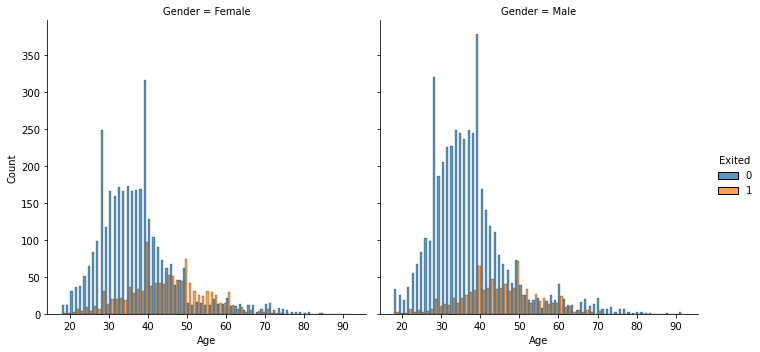

In [27]:
_= sns.displot(df, x="CreditScore", col="Exited", multiple="dodge")
_= sns.displot(df, x="Age", col="Gender",hue = 'Exited', multiple="dodge")

#Here the we comprehend from the graphs that females aged from 50 to 60 are more likely to churn than men 

<Figure size 720x720 with 0 Axes>

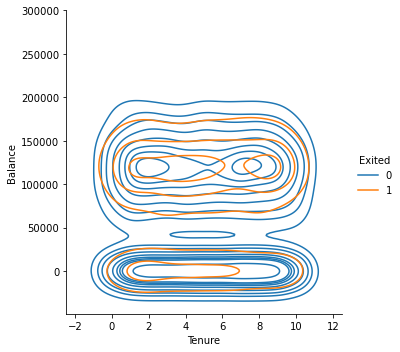

In [28]:
plt.figure(figsize= (10,10))
_= sns.displot(df, x="Tenure", y="Balance", hue="Exited", kind= 'kde')

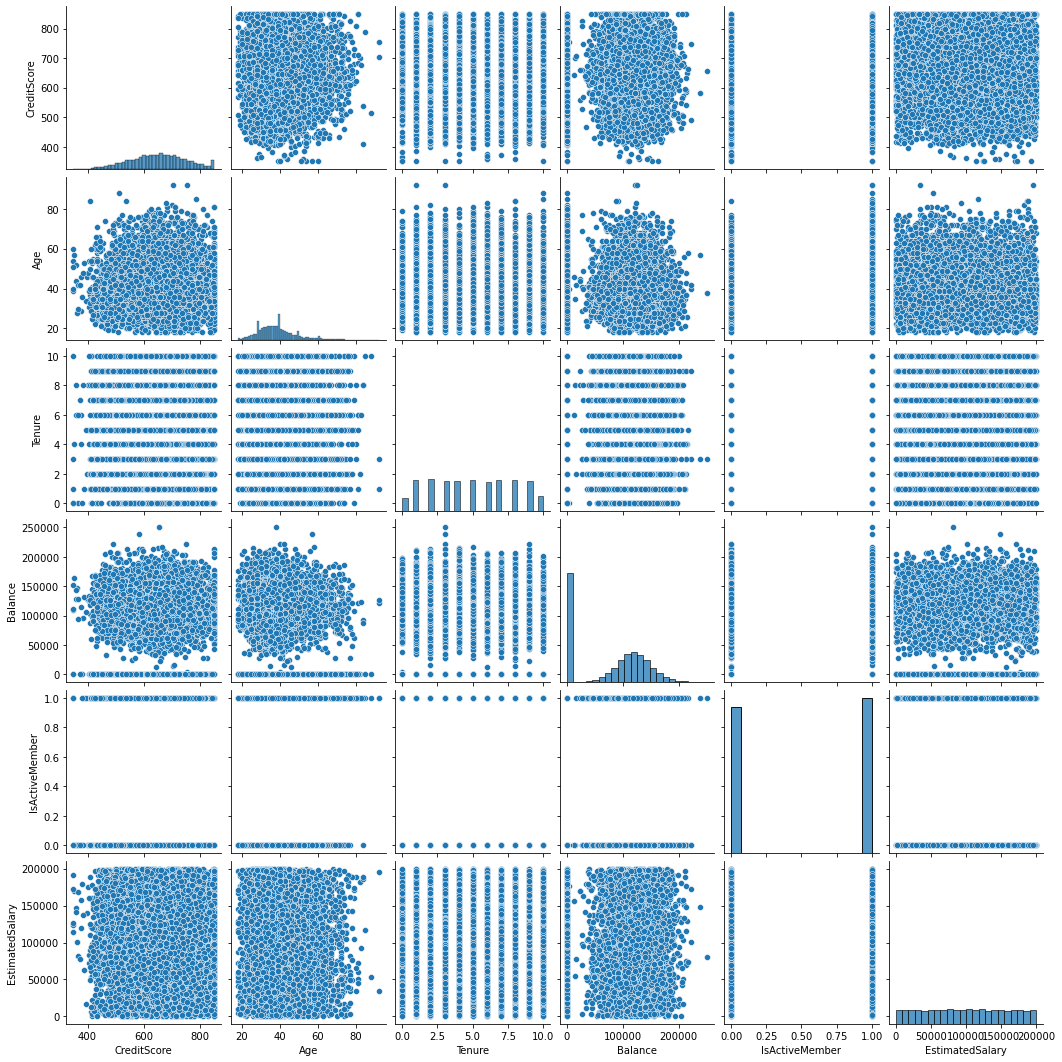

In [30]:
#pair plot for numerical values only 
sns.pairplot(df[num_col])

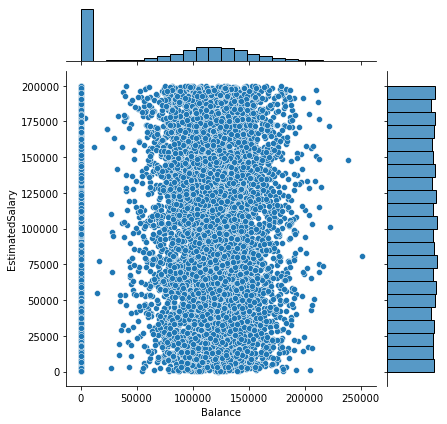

In [31]:
#joint plot for two variables
_ = sns.jointplot(data = df, x='Balance', y = 'EstimatedSalary')

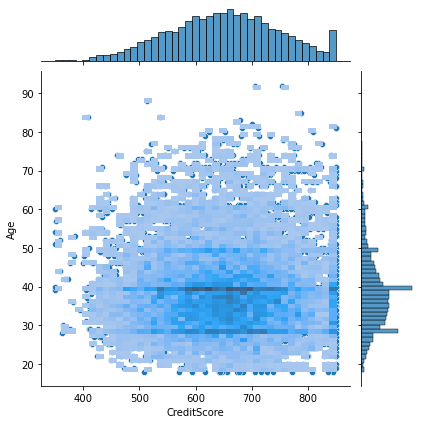

In [35]:
g = sns.jointplot(data = df, x='CreditScore', y = 'Age')
g.plot_joint(sns.histplot)

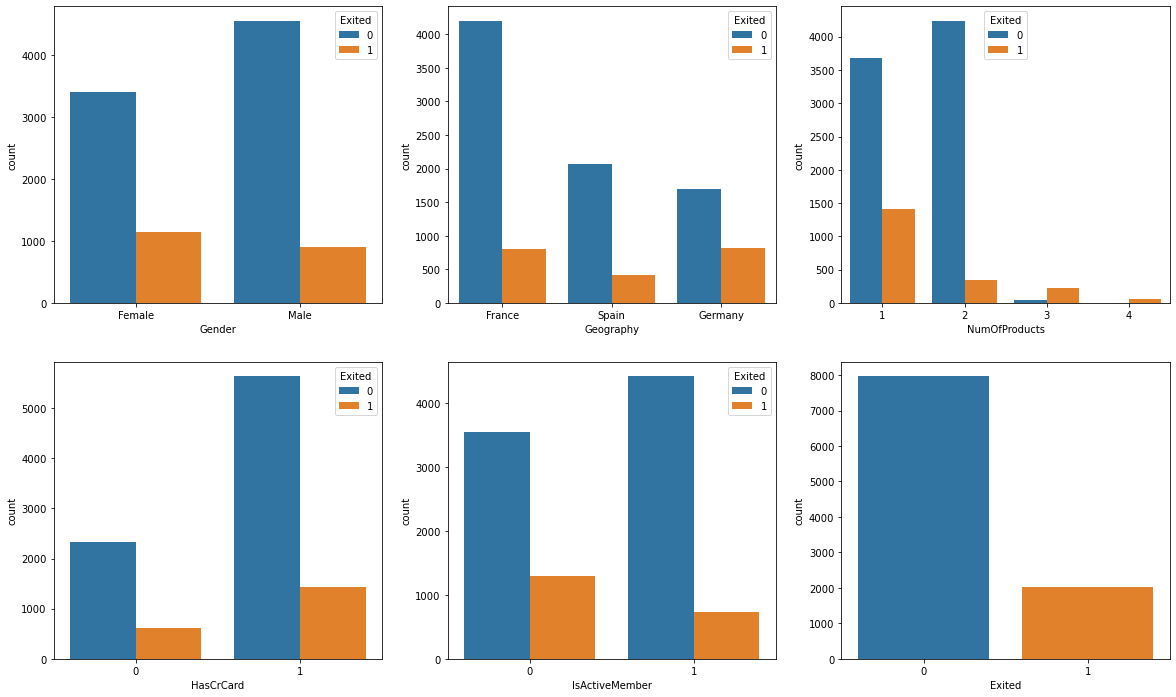

In [36]:
#Now count plots for categorical values
fig, ax= plt.subplots(2, 3, figsize=(20,12))
_=sns.countplot(x='Gender', data = df,hue='Exited', ax= ax[0][0])
_=sns.countplot(x='Geography', data = df,hue='Exited', ax= ax[0][1])
_=sns.countplot(x='NumOfProducts', data = df,hue='Exited', ax= ax[0][2])
_=sns.countplot(x='HasCrCard', data = df,hue='Exited', ax= ax[1][0])
_=sns.countplot(x='IsActiveMember', data = df,hue='Exited', ax= ax[1][1])
_=sns.countplot(x='Exited', data = df, ax= ax[1][2])

In [37]:
#Observations from the above plots
#Female customers are leaving the bank more than the male customers.
#Inactive customers are leaving the bank more than those active customers.
#Churn in customers having only 1 product is more. And Customers having more than 2 products are more likly to leave.


In [38]:
#Segregating all the customers according to the geography and balance more than zero
df_fr= df[(df['Geography'] == 'France') & (df['Balance'] != 0)]
df_sp= df[(df['Geography'] == 'Spain') & (df['Balance'] != 0)]
df_Gr= df[(df['Geography'] == 'Germany') & (df['Balance'] != 0)]

Text(0.5, 1.0, 'For Spain')

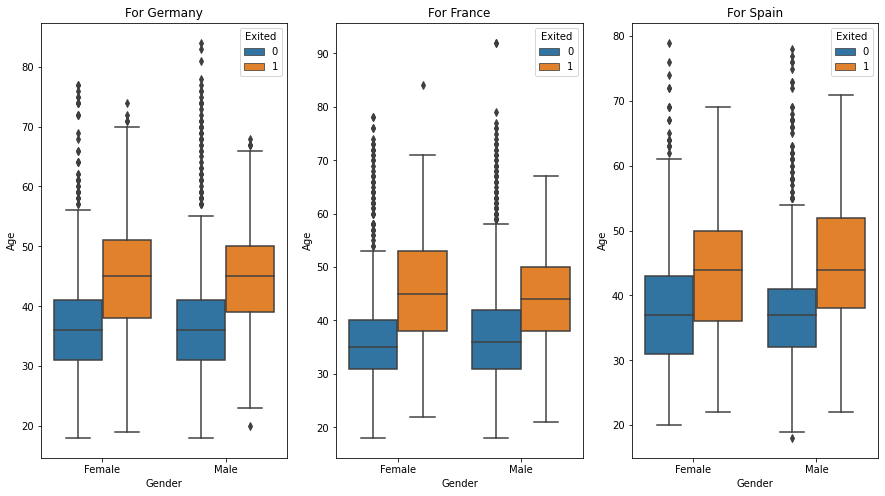

In [39]:
#box plots for each 
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
_= sns.boxplot(x= 'Gender', y= 'Age', data = df_Gr, hue = 'Exited')
plt.title('For Germany')
plt.subplot(1,3,2)
_= sns.boxplot(x= 'Gender', y= 'Age', data = df_fr, hue = 'Exited')
plt.title('For France')
plt.subplot(1,3,3)
_= sns.boxplot(x= 'Gender', y= 'Age', data = df_sp, hue = 'Exited')
plt.title('For Spain')



#according to this Germany has more churn ratio than France and Spain

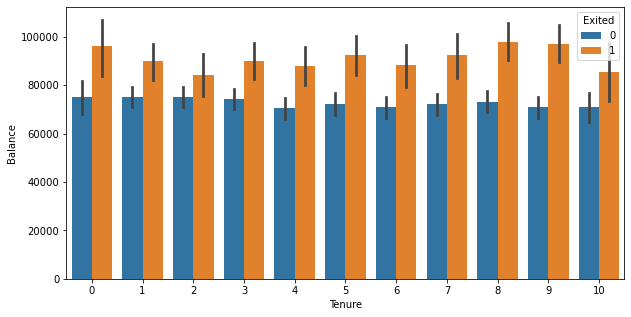

In [40]:
#Bar Plot
#Now we can get an estimate of central tendency for a numerical variable for each class on the x axis.
plt.figure(figsize=(10,5))
_= sns.barplot(x= 'Tenure', y= 'Balance', data = df, hue = 'Exited')

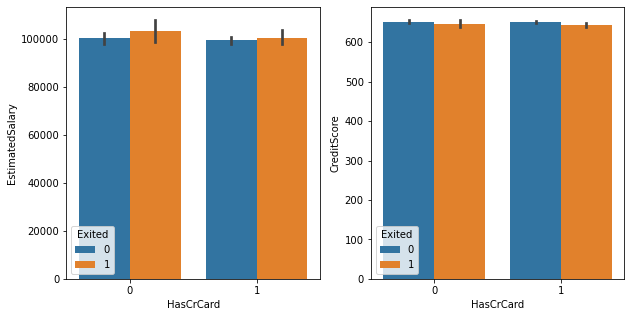

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
_= sns.barplot(x= 'HasCrCard', y= 'EstimatedSalary', data = df, hue = 'Exited')
plt.subplot(1,2,2)
_= sns.barplot(x= 'HasCrCard', y= 'CreditScore', data = df, hue = 'Exited')


#extimated salary has no relation

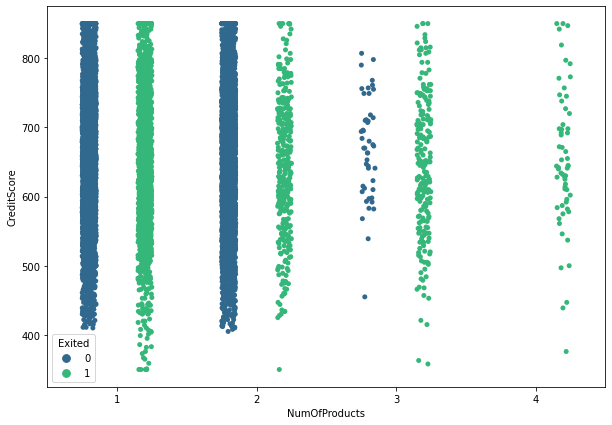

In [45]:
#Strip  plot 
plt.figure(figsize=(10,7))
_=sns.stripplot(x='NumOfProducts', y='CreditScore', data=df, hue='Exited', dodge=True, palette='viridis')


C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

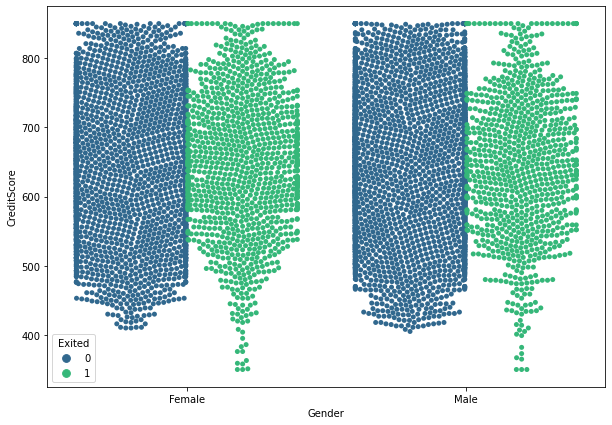

In [44]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='Gender', y='CreditScore', data=df, hue='Exited', dodge=True, palette='viridis')

C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arnav\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.2% of the points

<Figure size 1080x504 with 0 Axes>

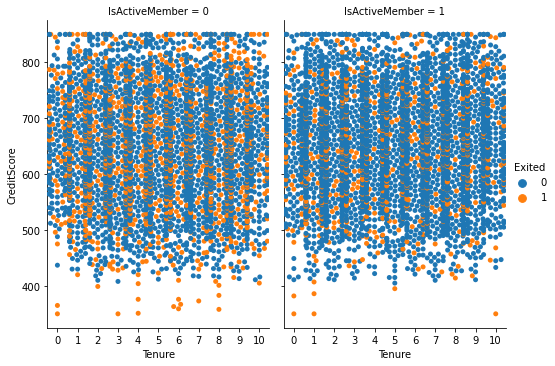

In [46]:
plt.figure(figsize=(15,7))
sns.catplot(x="Tenure", y="CreditScore", hue="Exited",
            col="IsActiveMember", aspect=.7,
            kind="swarm", data=df)

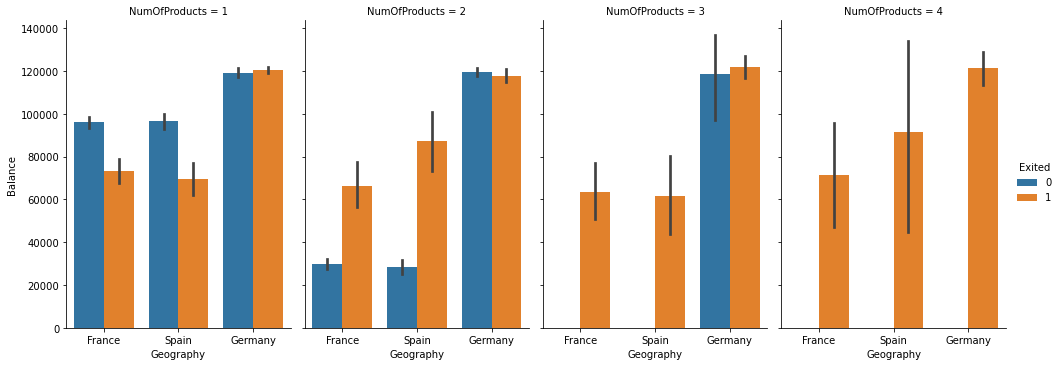

In [47]:
sns.catplot(x="Geography", y="Balance", hue="Exited",
            col="NumOfProducts", aspect=.7,
            kind="bar", data=df)

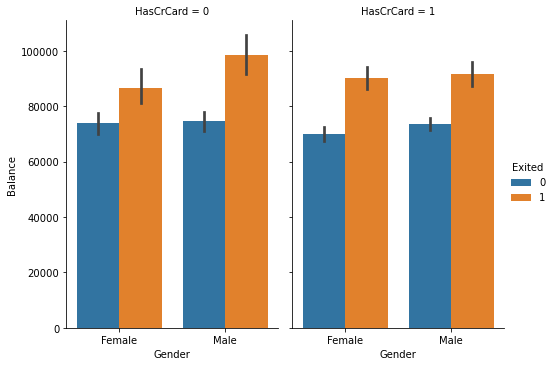

In [48]:
sns.catplot(x="Gender", y="Balance", hue="Exited",
            col="HasCrCard", aspect=.7,
            kind="bar", data=df)

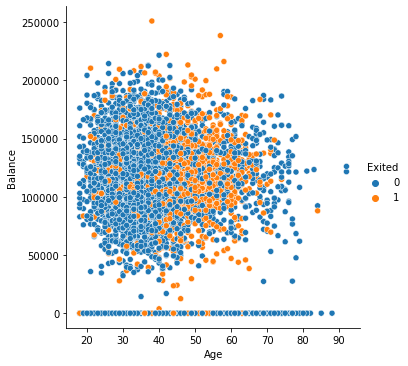

In [49]:
sns.relplot(x = 'Age',y = 'Balance',hue = 'Exited',kind = 'scatter',data = df,cmap = 'winter')

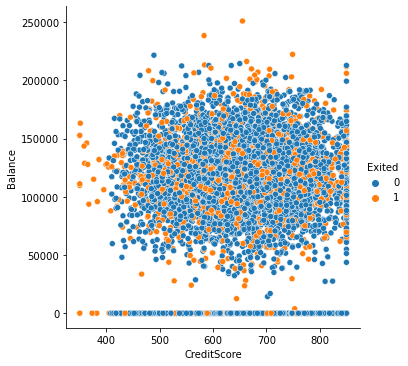

In [50]:
_= sns.relplot(x = 'CreditScore',
            y = 'Balance',
            hue = 'Exited',
            kind = 'scatter',
            data = df,
            cmap = 'winter')

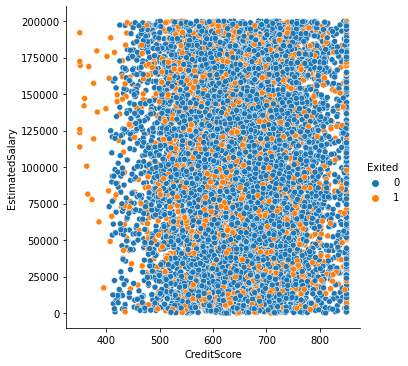

In [51]:
_= sns.relplot(x = 'CreditScore',
            y = 'EstimatedSalary',
            hue = 'Exited',
            kind = 'scatter',
            data = df,
            cmap = 'winter')

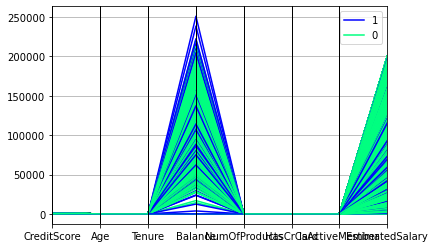

In [52]:
#Plot for finding the dots in the structure

#Parallel plots
df_1.drop(columns=['Geography','Gender'], inplace = True, axis =1)
_= pd.plotting.parallel_coordinates(
                                     df_1,
                                     'Exited',
                                     colormap='winter'
                                    )

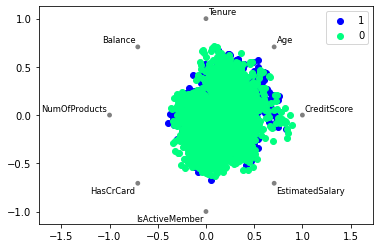

In [53]:
#radviz
_ = pd.plotting.radviz(
                        df_1,
                        class_column ='Exited',
                        colormap= 'winter'
                      )

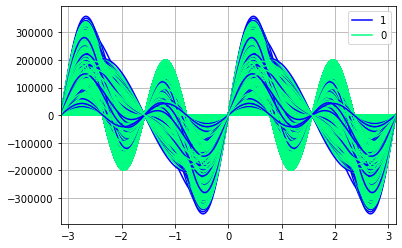

In [54]:
#andrew curves
_=pd.plotting.andrews_curves(
                              df_1,
                              'Exited',
                             colormap = 'winter'
                            )